# Working with HDF5 datasets

Before you can start loading HDF5 data, you need to install the `h5py` package.

`conda install h5py`

In [6]:
import numpy as np
import h5py

# Basic usage

In [7]:
# load hdf5 file
#f = h5py.File("/media/data/dmueller/ym_datasets/test_4_8p3.hdf5", "r")
f = h5py.File("/media/data/sbulusu/datasets/ym_datasets/test_4_8p3.hdf5", "r")

In [ ]:
# each hdf5 file consists of multiple datasets
# check out the names of the datasets
f.keys()

In [9]:
for key in f.keys():
    print(key)

P
beta
dims
trW
u
w
y


The hdf5 file consists of a few datasets

* `u` and `w`: array of link matrices and Wilson loop matrices
* `trW`: array of Wilson loop traces
* `y`: array of labels
* `beta`: array of coupling constants
* `P`: array of Polyakov loop traces

In [10]:
# dimensions of the lattice
f['dims']

<HDF5 dataset "dims": shape (4,), type "<i8">

In [11]:
# data is anly loaded 'lazily' from the file
# we have to explicitly access the array elements to see the values
f['dims'][:]

array([4, 8, 8, 8])

In [12]:
# lets print the shapes of all the array and the data types
print(f['u'].shape, f['u'].dtype)
print(f['w'].shape, f['w'].dtype)
print(f['trW'].shape, f['trW'].dtype)
print(f['beta'].shape, f['beta'].dtype)
print(f['y'].shape, f['y'].dtype)
print(f['P'].shape, f['P'].dtype)

(2000, 2048, 4, 2, 2) complex64
(2000, 2048, 6, 2, 2) complex64
(2000, 2048, 6) complex64
(2000,) float32
(2000,) int32
(2000,) float32


In [16]:
# access data like standard numpy arrays
f['trW'][1999]

array([[1.8593231+0.j, 1.3474445+0.j, 1.6442561+0.j, 1.626732 +0.j,
        1.4145662+0.j, 1.9127969+0.j],
       [1.9853619+0.j, 1.7971154+0.j, 1.7459404+0.j, 1.8987795+0.j,
        1.875567 +0.j, 1.9932044+0.j],
       [1.9521285+0.j, 1.6290618+0.j, 1.7158161+0.j, 1.9311266+0.j,
        1.5421947+0.j, 1.91811  +0.j],
       ...,
       [1.7009405+0.j, 1.3165945+0.j, 1.8595853+0.j, 1.6361184+0.j,
        1.7038369+0.j, 1.8042083+0.j],
       [1.9282148+0.j, 1.5456533+0.j, 1.5760418+0.j, 1.3350972+0.j,
        1.1928371+0.j, 1.8592515+0.j],
       [1.4567833+0.j, 1.8670393+0.j, 1.8928581+0.j, 1.7633663+0.j,
        1.9731896+0.j, 1.8960235+0.j]], dtype=complex64)

# Some plots

We can visually investigate the data very easily using `matplotlib`.

In [22]:
import matplotlib.pyplot as plt

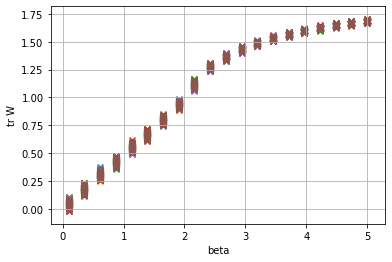

In [37]:
# plot the traces of Wilson loops
W = 6
for i in range(W):
    plt.scatter(f['beta'], np.real(np.mean(f['trW'], axis=1)[:, i]), marker='x')
plt.xlabel("beta")
plt.ylabel("tr W")
plt.grid()
plt.show()

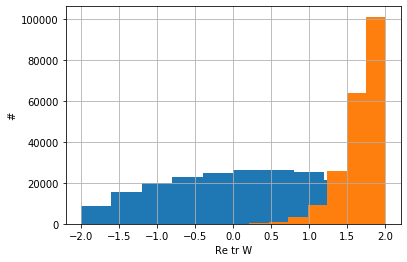

In [36]:
# histrogram of the first and last 'beta' value
plt.hist(np.real(f['trW'][0:100, :, 0]).flatten())
plt.hist(np.real(f['trW'][-100:, :, 0]).flatten())
plt.xlabel("Re tr W")
plt.ylabel("#")
plt.grid()
plt.show()

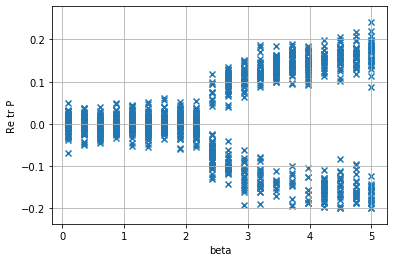

In [38]:
# plot the traces of Polyakov loops
plt.scatter(f['beta'], np.real(f['P']), marker='x')
plt.grid()
plt.xlabel("beta")
plt.ylabel("Re tr P")
plt.show()

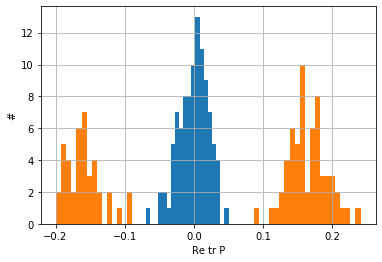

In [39]:
# histogram of the first and last 'beta' value
plt.hist(np.real(f['P'][0:100]), bins=20)
plt.hist(np.real(f['P'][-100:]), bins=60)
plt.grid()
plt.xlabel("Re tr P")
plt.ylabel("#")
plt.show()

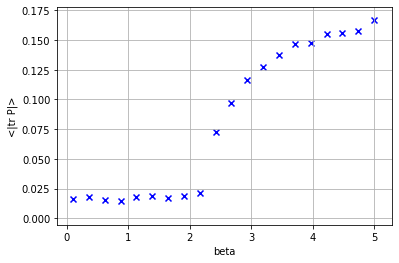

In [40]:
# recreate the Polyakov loop plot
num_examples = len(f['beta'])
num_per_beta = 50
num_beta = num_examples // num_per_beta

for i in range(num_beta):
    beta = f['beta'][i * num_per_beta]
    p = np.mean(np.abs(f['P'][i * num_per_beta:(i+1) * num_per_beta]))
    plt.scatter(beta, p, c='blue', marker='x')
plt.xlabel("beta")
plt.ylabel("<|tr P|>")
plt.grid()

Seems like the bias is gone from the Polyakov line, but the traces of Wilson loops are still always positive

In [13]:
# hdf5 files need to be closed manually
f.close()